# MLP OPE 1 Examination

## Que 1

In [4]:
# Q: Which dataset are you using for this exam?
# Ans: V5
# Comments: Downloaded from the link in the portal and uploaded to the local storage of the Colab notebook

## Que 2

In [5]:
# Q: Load the dataset. What is its shape?

import pandas as pd
df = pd.read_csv('v5.csv')
print(df.shape)

(1000, 19)


In [6]:
df.head()

,Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,The former Yugoslav republic of Macedonia,Developing,75.1,15.0,0,1.23,0.000000,98.0,7,58.5,0,97.0,6.76,95.0,0.1,NaN,NaN,0.739,12.9
1,Namibia,Developing,57.4,41.0,3,5.73,35.809785,NaN,469,24.5,4,8.0,6.11,79.0,22.8,257.995570,1899257.0,0.559,11.5
2,Malta,Developed,78.2,75.0,0,5.73,1552.740429,NaN,7,63.4,0,95.0,7.86,95.0,0.1,11843.939200,395969.0,0.786,13.8
3,Gambia,Developing,57.3,296.0,3,2.51,0.000000,95.0,0,2.3,6,88.0,4.35,87.0,2.9,NaN,NaN,0.404,7.6
4,Pakistan,Developing,64.4,178.0,367,0.03,3.912745,75.0,2801,2.1,459,75.0,3.35,75.0,0.1,95.432793,16332974.0,0.505,6.7


## Que 3

In [7]:
# Q: How many missing values are there in the column 'Life_expectancy'?
# If there are, remove the corresponding rows from the data. Note that this modified data will be used for the subsequent questions.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1000 non-null   object 
 1   Status                           1000 non-null   object 
 2   Life_expectancy                  996 non-null    float64
 3   Adult_Mortality                  996 non-null    float64
 4   infant_deaths                    1000 non-null   int64  
 5   Alcohol                          933 non-null    float64
 6   percentage_expenditure           1000 non-null   float64
 7   Hepatitis_B                      808 non-null    float64
 8   Measles                          1000 non-null   int64  
 9   BMI                              990 non-null    float64
 10  under-five_deaths                1000 non-null   int64  
 11  Polio                            994 non-null    float64
 12  Total_expenditure    

In [8]:
# Comment: Seems like there are 4 null values in Life expectancy. Let's verify it
df['Life_expectancy'].isna().sum()

4

In [9]:
# Comment: Now dropping those rows from the dataset
df.dropna(subset=['Life_expectancy'], inplace=True)
df['Life_expectancy'].isna().sum()  # should be zero now

0

In [10]:
df.shape  # should be 996 now, since 4 rows containing null values for Life_expectancy are dropped

(996, 19)

## Que 4

In [11]:
# Q: How many categorical features are there in the dataset?
# Comment: For each column, check if it is a Object dtype, and sum them up

[col for col in df if pd.api.types.is_object_dtype(df[col])]

['Country', 'Status']

In [12]:
df[['Country', 'Status']].head()

,Country,Status
0,The former Yugoslav republic of Macedonia,Developing
1,Namibia,Developing
2,Malta,Developed
3,Gambia,Developing
4,Pakistan,Developing


In [13]:
# So there are two categorical columns

## Que 5

In [14]:
# Q: What is the average BMI in the dataset?
df['BMI'].mean()

37.63228744939271

## Que 6

In [15]:
# Q: How many missing values are there in the columns 'Hepatitis_B' and 'Population'?
df[['Hepatitis_B', 'Population']].isna().sum(axis=0)

Hepatitis_B    192
Population     218
dtype: int64

## Que 7

In [16]:
# Q: How many unique countries are there in the dataset?
df['Country'].nunique()

183

## Que 8

In [17]:
# Q: The column 'Life_expectancy' is to be used as the target column.
# Split the data into the feature matrix (X) and target column (y),
# where 'Life_expectancy' goes to y and rest of the columns go to X.
# What is the average 'Life_expectancy' in the dataset?

X, y = df.drop(['Life_expectancy'], axis=1), df['Life_expectancy']

# Average 'Life_expectancy'
y.mean()

69.18333333333334

## Que 9

In [18]:
# Q: Split X and y into X_train, X_test, y_train and y_test where 20% of the data goes to test set.
# Keep the random_state to be 32.
# What is the average value of GDP in training and test data (rounded to 2 decimal places)?

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Average GDP in train and test sets, respectively
X_train['GDP'].mean(), X_test['GDP'].mean()

(6347.623884226347, 8154.315378144317)

## Que 10

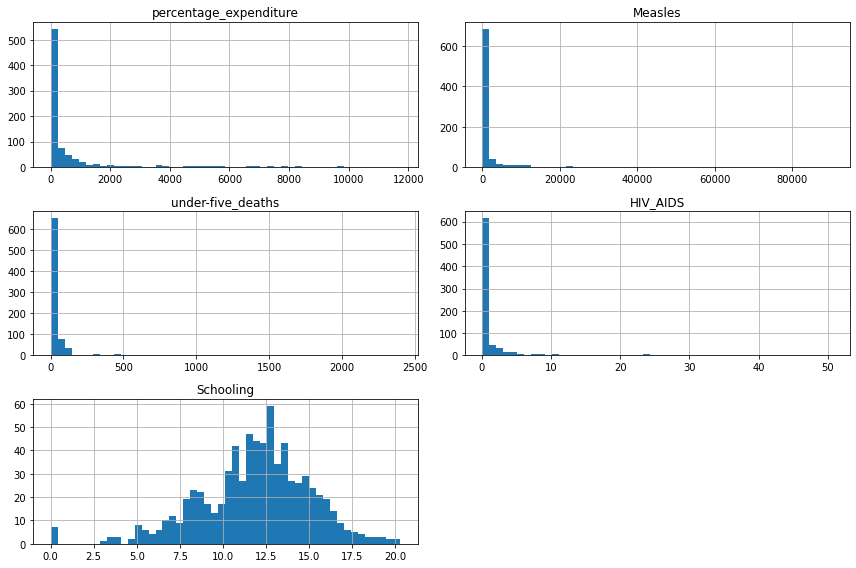

In [19]:
# Q: Plot the distribution of different numerical features in the training data. Which of the following features has close to normal distribution?
# Percentage_expenditure
# Measles
# Under-five_deaths
# HIV_AIDS
# Schooling
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
cols = ['percentage_expenditure', 'Measles', 'under-five_deaths', 'HIV_AIDS', 'Schooling']

for col, _ax in zip(cols, ax.ravel()[:-1]):
  X_train[col].hist(bins=50, ax=_ax)
  _ax.set_title(col)
ax.ravel()[-1].set_axis_off()
plt.tight_layout()

In [20]:
# Seems like Schooling is close to Gaussian

## Que 11

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


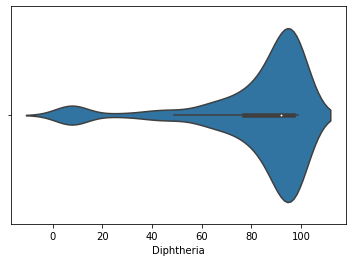

In [21]:
# Q: For the feature `Diphtheria` in the feature matrix training set `X_train`,
# draw a violin plot and find which of the following ranges hold most of the values?

import seaborn as sns

sns.violinplot(X_train['Diphtheria'])

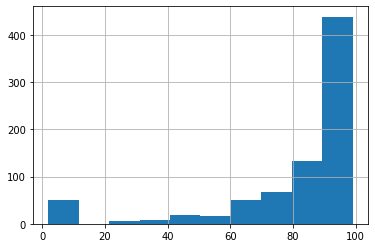

In [22]:
# The peaks seem to be between 80-100, double check with a histogram, just to be sure.
X_train['Diphtheria'].hist()

## Que 12

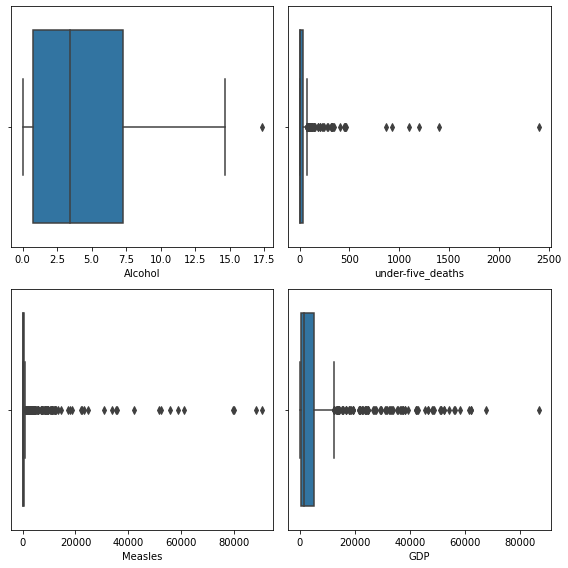

In [23]:
# Q: By plotting a box plot for the numerical features of the feature matrix training set X_train,
# find out which of the following features have no outliers?
cols = ['Alcohol', 'under-five_deaths', 'Measles', 'GDP']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for col, _ax in zip(cols, ax.ravel()):
  sns.boxplot(x=X_train[col], ax=_ax)
plt.tight_layout()

In [24]:
# Looks like everything has outliers

## Que 13

Generate a new matrix consisting of all polynomial combinations of the features with degree 2 (For example, if an input sample is two dimensional and of the form [a,b] , the degree-2 polynomial features are $[1,a,b,a^2,ab,b^2]$) from the training set of feature matrix `X_train`. Fit and transform the training set of the feature matrix columns `[2:4]` and save it with the name `polydata`, after applying the polynomial transformation. Note that the `polydata` will not be utilized in subsequent questions. Choose the shape of `polydata` from the following options.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

polyf = PolynomialFeatures(degree=2)
polydata = polyf.fit_transform(X_train.values[:, 2:4])
polydata.shape

(796, 6)

## Que 14

Prepare a pipeline `numeric_transformer` containing `SimpleImputer (strategy="mean")` and `StandardScaler()` (in this sequence). Preprocess the 
of the given data `['Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Income_composition_of_resources', 'Schooling']` using this pipeline.

Apply `categorical_transformer = OneHotEncoder()` on the categorical_features `('Country', 'Status')` and other features will pass unchanged.

IMPORTANT NOTE:

1. The data obtained by transforming via this pipeline will be used for the rest of the questions.

2. Use the pipeline to preprocess training data and then apply on test data

What is the length of the `numeric_transformer` pipeline?

![](https://backend.seek.onlinedegree.iitm.ac.in/22t2_mlp13/assets/img/Screenshot%202022-06-17%20100504.png)

> Seems like we can't use OneHotEncoder separately on train and test splits for the "Country" column. The encoder might not see the same countries across the split!

In [26]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

nums = ['Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure',
        'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio',
        'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
        'Income_composition_of_resources', 'Schooling']
cats = ['Country', 'Status']

num_pipe = Pipeline([
  ('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())
])
X_train_nums = num_pipe.fit_transform(X_train[nums])

print(len(num_pipe))  # Should be 2, one step for the imputer and the other for the scaler

2


## Que 15

In [27]:
# Q: Calculate the shape of the training set of feature matrix X_train of the dataset.

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cats = ohe.fit_transform(X_train[cats])

X_train_transformed = np.c_[X_train_nums, X_train_cats]
X_train_transformed.shape

(796, 200)

In [28]:
X_test_cats = ohe.transform(X_test[cats])
X_test_nums = num_pipe.transform(X_test[nums])
X_test_transformed = np.c_[X_test_nums, X_test_cats]
X_test_transformed.shape

(200, 200)

## Que 16

Apply RFE and select 15 features from the training dataset and calculate the rank of each feature. Which of the following statements are true?
(Count first feature as number 1, second feature as number 2 and so on.)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=15)
rfe.fit(X_train_transformed, y_train)

rfe.support_

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Que 17
Fit a LinearRegression model that uses the normal equation to learn the weights on the train data (X_train and y_train). Enter the value of score obtained using training data upto four decimal places.

In [30]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
lr.score(X_train_transformed, y_train)

0.9677126501420147

## Que 18

Using a Linear regression model, compute the cross-validation scores for 15 splits on training data (`X_train` and `y_train`) using `cross_val_score`.
Enter the maximum value obtained upto four decimal places. By default `cross_val_score` uses `LinearRegression`'s scoring metric, which is R2.


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_train_transformed, y_train, cv=15)
# print(scores)
# print(scores.mean())
print(scores.max())

0.9685080866600788


## Que 19

Fit a 
Stochastic Gradient Descent regressor model on the training data (`X_train` and `y_train`). Set the following parameters:

i. penalty = l1

ii. alpha = 0.001

iii. learning_rate = 'constant'

iv. initial learning rate = 0.001

v. random state = 42


Other parameters are initialized with default values.
Compute the `mean_squared_error` for training data. Using the trained model, make predictions on test data and then compute the `mean_squared_error` for the test data also. Find the absolute difference between the training and testing errors computed and enter the value upto two decimal places, i.e.  $\|MSE_{train}−MSE_{test}\| .$

In [32]:
# There might be a problem here since we're dealing with the test data for the first time,
# And the "country" column has not been correctly One-hot encoded.

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

clf = SGDRegressor(penalty='l1', alpha=0.001, learning_rate='constant',
                   eta0=0.001, random_state=42)
clf.fit(X_train_transformed, y_train)

mse_train = mean_squared_error(y_train, clf.predict(X_train_transformed))
mse_test  = mean_squared_error(y_test, clf.predict(X_test_transformed))
print(abs(mse_train - mse_test))

1.7657484972401658


## Que 20

Train a Stochastic Gradient Descent regressor model on the training data with different values for the parameters as follows:

(i) penalty = l2

(ii) alpha = 0.01

(iii) learning_rate = 'adaptive'

(iv) initial learning rate = 0.01

(v) random state = 42

(vi) loss = 'huber'

Other parameters are initialized with default values.
Using the trained model, make predictions on test data and then compute the `r2_score` for the test data. Enter the value upto four decimal places.

In [33]:
clf = SGDRegressor(penalty='l2', alpha=0.01, learning_rate='adaptive',
                   eta0=0.01, random_state=42, loss="huber")
clf.fit(X_train_transformed, y_train)

clf.score(X_test_transformed, y_test)

0.8066855671012136

## Que 21

Apply cross validation strategy on SGD regression model with parameters same as that of previous question using `ShuffleSplit` with 10 number of splits and 0.2 test size on 'train data'. Use 
random_state=42 `ShuffleSplit`.
Enter the standard deviation value of 
`cross_val_score` obtained upto four decimal places.

In [ ]:
from sklearn.model_selection import ShuffleSplit


clf = SGDRegressor(penalty='l2', alpha=0.01, learning_rate='adaptive',
                   eta0=0.01, loss="huber")

splitter = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
cross_val_score(clf, X_train_transformed, y_train, cv=splitter).std()

## Que 22

Take Lasso estimator with regularization rate 0.05 to train the model using Training data. What would be the value of Mean Squared error for test data?(Set random state =42)

In [35]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.05, random_state=42)
clf.fit(X_train_transformed, y_train)

mean_squared_error(y_test, clf.predict(X_test_transformed))

14.270832667572966

## Que 23

Create a baseline model using Ridge estimator with fixed learning rate 0.5. What is the R2 score you got on training data(Set random state =32 )?

In [36]:
# This seems ambiguous - Ridge does not have a learning rate :-\
# Gets clarified in the next question - this is alpha, not learning rate

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5, random_state=32).fit(X_train_transformed, y_train)
ridge.score(X_train_transformed, y_train)

0.9605523665381359

## Que 24

Using above baseline Ridge model with fixed regularization rate 0.5, Predict the R2 score for the test data?

In [37]:
ridge.score(X_test_transformed, y_test)

0.9409185861412691

## Que 25

Common Instructions for Q25, Q26

i) Use Ridgecv as an estimator to train the model.

i) Use following list for alpha values. alpha_list = `[1e-4,1e-3, 1e-2, 1e-1, 1]`.

ii) Keep r2_score as scoring parameter.

iii) Keep Cross validation iterator "RepeatedKFold" for cv and keep splitting iterations parameter n_split=5,n_repeats=5 and random_state=rs.

iv) Use Training data(X_train, y_train) for model training.


Which of the following alpha value gives the best R2 score for training data?

In [38]:
# Question says random_state=rs?

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=5)
rcv = RidgeCV(alphas=[1e-4,1e-3, 1e-2, 1e-1, 1], cv=rkf)
rcv.fit(X_train_transformed, y_train)
rcv.alpha_

0.1

## Que 26

What is the best r2_score you got with best alpha value for training data?(Choose closest value)

In [39]:
rcv.best_score_

0.9080265169869243

## Que 27
Create a pipeline Using PolynomialFeatures as transformer and Lasso as estimator. Use gridsearch with above pipeline and following hyperparameter values.

i) Keep polynomial degree as : (1, 2, 3)

ii) alpha value : np.logspace(-4, 0, num=10)

iii) scoring : neg_mean_absolute_error

iv) Use Training data(X_train, y_train) to fit the model.


Enter the regularization rate which gives the lowest mean square error value for training data ?


In [40]:
from sklearn.model_selection import GridSearchCV
GridSearchCV?

In [43]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
  ('poly', PolynomialFeatures()),
  ('est', Lasso())
])

grid = {
    'poly__degree': [1, 2,],
    'est__alpha': np.logspace(-4, 0, num=10),
}
gcv = GridSearchCV(pipe, param_grid=grid, scoring='neg_mean_absolute_error', n_jobs=-1)
gcv.fit(X_train_transformed, y_train)

print(gcv.best_score_)
print(gcv.best_params_)


# This crashes the notebook!

-1.6383192773937054
{'est__alpha': 0.000774263682681127, 'poly__degree': 1}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+03, tolerance: 6.917e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# ^ This worked only because the polyfeats was removed!

## Que 28

## Rough work below this

In [ ]:
# ohe = OneHotEncoder(sparse=False)
# X_train_cats = ohe.fit_transform(X_train[cats])

# X_train_transformed = np.c_[X_train_nums, X_train_cats]


# # Do the same on the test data
# X_test_nums = num_pipe.transform(X_test[nums])
# X_test_cats = ohe.transform(X_test[cats])
# X_test_transformed = np.c_[X_test_nums, X_test_cats]